Считаем файл


2.1 2 2
Date
2019-04-05 14:00:00    831.156938
2019-04-05 14:10:00    807.921000
2019-04-05 14:20:00    722.121375
2019-04-05 14:30:00    735.385688
2019-04-05 14:40:00    902.545062
                          ...    
2019-04-12 13:10:00    235.294344
2019-04-12 13:20:00    469.788437
2019-04-12 13:30:00    464.807062
2019-04-12 13:40:00    343.407438
2019-04-12 13:50:00    180.682844
Name: VES1, Length: 1008, dtype: float64


<AxesSubplot:xlabel='Date'>

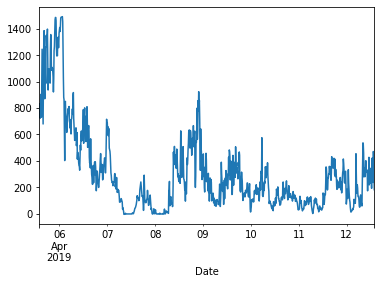

In [287]:
import pandas as pd
import matplotlib.pyplot as plt


print(2.1, 2,2)
DF=pd.read_csv('VES_FinalDataset.csv',
                        sep=';',
                        decimal=',',
                        encoding='latin1',
                        parse_dates=['Date'],
                        dayfirst=True,
                        index_col='Date')

print(DF['VES1'])
DF['VES1']=pd.to_numeric(DF['VES1'])
DF['VES2']=pd.to_numeric(DF['VES2'])
plt.figure()
DF['VES1'].plot()

Уход от отирицательных значений активной мощности


<AxesSubplot:xlabel='Date'>

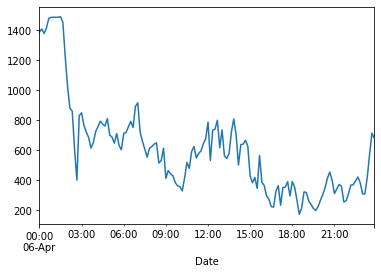

In [288]:
DF[DF < 0] = 0.01
print()
DF['VES1'][60:204].plot()

Проверка минимального значения

In [289]:
import numpy as np

print(np.nanmin(DF['VES2']))


0.01


### Начало работы с алгоритмами оптимизации

##### Фильтр Ходрика Прескотта

<AxesSubplot:xlabel='Date'>

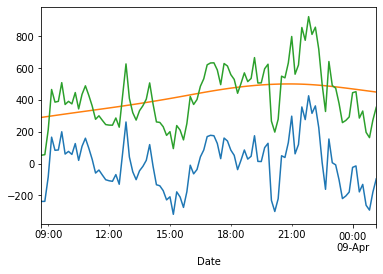

In [290]:
import statsmodels.api as sm

HP_cycle, HP_trend = sm.tsa.filters.hpfilter(DF['VES1'][400:500], lamb=129600)

HP_cycle.plot()
HP_trend.plot()
DF['VES1'][400:500].plot()

##### Фильтр Савицкого-Голея

[ 52.71049219  56.18378516 212.3248438  465.439      386.1453125
 391.0829375  508.4506563  371.37       391.1185938  375.1004688
 446.2247813  343.6058125  434.8413438  488.6425313  428.726875
 361.9855     278.3975     300.3430313  272.09725    245.2197656
 241.7929219  241.3374375  286.499125   228.8446875  426.7900938
 626.1631875  409.630375   319.7464375  273.4397188  332.3867188
 363.6501563  404.8687188  506.8408125  374.49125    261.7865
 258.761625   231.7907813  177.2987188  200.5135625   94.13997656
 238.9857656  210.4828438  148.9692031  251.4504688  421.7792813
 371.3365     402.5460625  485.7939375  532.91225    620.413625
 632.2358125  633.0559375  588.13625    495.8895     628.60475
 613.1225625  558.7961875  528.795625   441.7807188  503.0683125
 570.065125   515.163375   534.8481875  665.797625   506.3609063
 507.094375   595.734625   624.2729375  267.0104375  197.9043125
 279.0172188  549.276125   538.73975    632.4830625  798.401
 561.5229375  619.4383125  854.7863

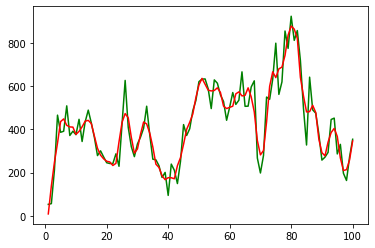

In [291]:
from scipy.signal import savgol_filter



dt=DF['VES1'][400:500].to_numpy()
print(dt)
x=np.array(range(1, int(100) + 1))
print(x)
ySavGolFilter = savgol_filter(dt, 7, 2) # window size 7, polynomial order 2
plt.plot(x, dt, color='green')
plt.plot(x, ySavGolFilter, color='red')
plt.show()

##### На основе блока скользящего среднего (путем свертки)

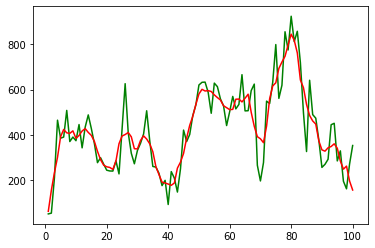

In [292]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


plt.plot(x, dt, color='green')
plt.plot(x, smooth(dt,5), color='red')
plt.show()